In [177]:
# Dependencies
from splinter import Browser
from bs4 import BeautifulSoup as bs
import time
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [178]:
# Splinter set up
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [179]:
# Website path
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [191]:
# Create Beautiful Soup object
html = browser.html
soup = bs(html, 'html.parser')

In [192]:
# Scrape website for data rows
results = soup.find_all('tr', class_='data-row')

# Empty lists for each column of data
id = []
terrestrial_date = []
sol = []
ls =[]
month = []
min_temp = []
pressure = []

# Iterate through each data row appending lists with data
column = 0
for result in results:
    row = result.find_all('td')
    for cell in row:
            column += 1
            if column == 1:
                id.append(cell.text)
            elif column == 2:
                terrestrial_date.append(cell.text)
            elif column == 3:
                sol.append(cell.text)
            elif column == 4:
                ls.append(cell.text)
            elif column == 5:
                month.append(cell.text)
            elif column == 6:
                min_temp.append(cell.text)
            elif column == 7:
                pressure.append(cell.text)            
    column = 0

In [194]:
# Create Dataframe from lists
mars_df = pd.DataFrame({"id": id,
                        "terrestrial_date": terrestrial_date,
                        "sol": sol,
                        "ls": ls,
                        "month": month,
                        "min_temp": min_temp,
                        "pressure": pressure})
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [237]:
# Assign datatypes to dataframe columns
mars_df = mars_df.astype({'id': 'int64',
                            'sol': 'int64',
                            'ls': 'int64',
                            'month': 'int64',
                            'min_temp': 'float64',
                            'pressure': 'float64'
                            })
mars_df.terrestrial_date = pd.to_datetime(mars_df.terrestrial_date)
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [196]:
# Number of months on Mars
num_months = len(mars_df.month.unique())
print(f"There are {num_months} months on Mars")

There are 12 months on Mars


In [197]:
# Number of Martian days worth of data
num_data_days = len(mars_df.sol.unique())
print(f"Data was collected on {num_data_days} separate Martian days")

Data was collected on 1867 separate Martian days


In [198]:
# By average, Coldest and Warmest months on Mars (at Curiosity location)
avg_min_temp = mars_df.groupby('month').mean().min_temp
month_min = [month for month, temp in enumerate(avg_min_temp) if temp == avg_min_temp.min()][0]+1
month_max = [month for month, temp in enumerate(avg_min_temp) if temp == avg_min_temp.max()][0]+1

print(f"The coldest month on Mars at the Curiosity location is month {month_min},\n     with an average temperature of {round(avg_min_temp[month_min],3)} degrees Celsius")
print(f"The warmest month on Mars at the Curiosity location is month {month_max}, \n     with an average temperature of {round(avg_min_temp[month_max],3)} degrees Celsius")

The coldest month on Mars at the Curiosity location is month 3,
     with an average temperature of -83.307 degrees Celsius
The warmest month on Mars at the Curiosity location is month 8, 
     with an average temperature of -68.383 degrees Celsius


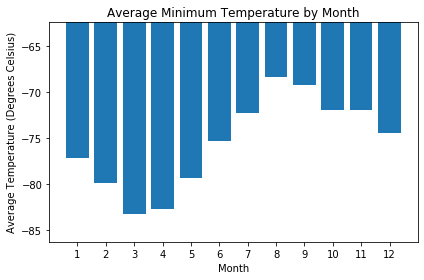

In [199]:
# Graph monthly temperatures with Matplotlib
x_axis = np.arange(len(avg_min_temp))+1

plt.bar(x_axis, avg_min_temp)
plt.xticks(x_axis)

plt.title("Average Minimum Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Average Temperature (Degrees Celsius)")

plt.ylim(min(avg_min_temp)-3,max(avg_min_temp)+6)

plt.tight_layout()
plt.show()

In [200]:
# By average, months with lowest and highest atmospheric pressure on Mars (at Curiosity location)
avg_pressure = mars_df.groupby('month').mean().pressure
month_min = [month for month, pressure in enumerate(avg_pressure) if pressure == avg_pressure.min()][0]+1
month_max = [month for month, pressure in enumerate(avg_pressure) if pressure == avg_pressure.max()][0]+1

print(f"The month on Mars with the lowest atmospheric pressure at the Curiosity location is month {month_min},\n     with an average atmospheric pressure of {round(avg_pressure[month_min],3)} pascals")
print(f"The month on Mars with the highest atmospheric pressure at the Curiosity location is month {month_max}, \n     with an average atmospheric pressure of {round(avg_pressure[month_max],3)} pascals")

The month on Mars with the lowest atmospheric pressure at the Curiosity location is month 6,
     with an average atmospheric pressure of 745.054 pascals
The month on Mars with the highest atmospheric pressure at the Curiosity location is month 9, 
     with an average atmospheric pressure of 913.306 pascals


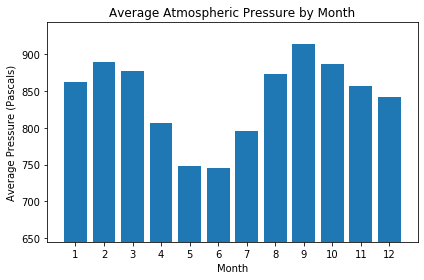

In [201]:
# Graph monthly atmospheric pressure with Matplotlib
x_axis = np.arange(len(avg_pressure))+1

plt.bar(x_axis, avg_pressure)
plt.xticks(x_axis)

plt.title("Average Atmospheric Pressure by Month")
plt.xlabel("Month")
plt.ylabel("Average Pressure (Pascals)")

plt.ylim(min(avg_pressure)-100,max(avg_pressure)+30)

plt.tight_layout()
plt.show()

In [223]:
# How many earth days in a Martian year
# List of terrestrial dates for the first day of each Martian month 1
first_day_year = []

mars_yr_df = mars_df[['terrestrial_date','month']]

for i, j in mars_yr_df.T.iteritems():
    if mars_yr_df.iloc[i, 1] != mars_yr_df.iloc[i-1, 1] and mars_yr_df.iloc[i, 1] == 1 :
        first_day_year.append(mars_yr_df.iloc[i, 0])

first_day_year

[Timestamp('2013-08-01 00:00:00'),
 Timestamp('2015-06-19 00:00:00'),
 Timestamp('2017-05-06 00:00:00')]

In [244]:
# Calculate number of complete Martian years in the dataset, and the start / end dates
mars_yrs = len(first_day_year)-1
start_terra_dt = first_day_year[0]
end_terra_dt = first_day_year[mars_yrs]

print(f"Dataset covers {mars_yrs} complete Martian years")
print(f"The first complete Martian year started on {start_terra_dt.date()}")
print(f"The final complete Martian year ended on {end_terra_dt.date()}")

Dataset covers 2 complete Martian years
The first complete Martian year started on 2013-08-01
The final complete Martian year ended on 2017-05-06


In [248]:
# Calculate total number of Earth days passed (that equate to total number of Martian years passed)
earth_days = end_terra_dt - start_terra_dt

# Calculate approximate number of Earth days in a Martian year
days_in_mars_yr = earth_days / mars_yrs
print(f"There are approximately {days_in_mars_yr.days} Earth days in a Martian year")

There are approximately 687 Earth days in a Martian year


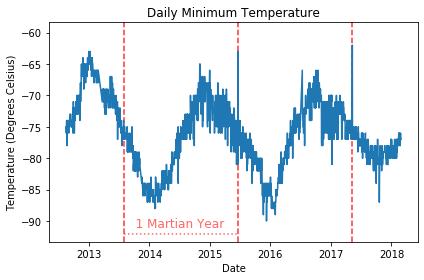

In [281]:
# Plot daily minimum temperature with visuals aligning Earth dates and Martian years

plt.plot(mars_df.terrestrial_date, mars_df.min_temp)

plt.title("Daily Minimum Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (Degrees Celsius)")

plt.ylim(min(avg_min_temp)-10,max(avg_min_temp)+10)

for y in range(0,mars_yrs+1):
    plt.vlines(first_day_year[y], min(avg_min_temp)-10, max(avg_min_temp)+10, alpha=0.8, linestyle="dashed", color="r")

plt.hlines(-92,first_day_year[0],first_day_year[1], alpha=0.6, linestyle="dotted", color="r")
plt.annotate('   1 Martian Year', [first_day_year[0].date(),-91], fontsize=12, color="red", alpha=0.6)

plt.tight_layout()
plt.show()

In [282]:
# Export dataframe to CSV
mars_df.to_csv('output/mars_data.csv', index=False)